<a href="https://colab.research.google.com/github/MykolaKud/Data_analytics_projects/blob/main/Chicago_taxi_project_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Chicago Taxi Trips** dataset contains data on most taxi trips from all services during the period from 2013. For analysis, I selected a sample from the year 2021 from a taxi service called **Blue Ribbon Taxi Association Inc.** The data is sourced from an open source in Google Big Query.

Brief description of the sample

Each row is a unique trip identification number. For analysis, I selected 13 columns:
1. unique_key - Unique trip identifier.
2. trip_start_timestamp - when the trip started, rounded to the nearest 15 minutes.
3. trip_end_timestamp - when the trip ended, rounded to the nearest 15 minutes.
4. trip_seconds - trip duration in seconds.
5. trip_miles - trip length in miles.
6. fare - trip cost.
7. tips - tips left by the customer.
8. tolls - road fees.
9. extras - extra charges for the trip.
10. trip_total - total amount paid for the trip by the passenger.
11. payment_type - payment type for the trip (may be unknown).
12. pickup_community_area - location of passenger pickup (may be unspecified for privacy reasons).
13. dropoff_community_area - location of passenger drop-off (may be unspecified for privacy reasons).

In [ ]:
!pip install google-cloud-bigquery pandas

In [ ]:
from google.cloud import bigquery
from google.colab import files

# Loading the JSON key
uploaded = files.upload()

Saving steadfast-icon-444914-t8-12283520df80.json to steadfast-icon-444914-t8-12283520df80.json


In [ ]:
# Setting the path to the key
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "steadfast-icon-444914-t8-12283520df80.json"

# Configuring the client to work with BigQuery
client = bigquery.Client()

In [ ]:
# SQL query from BigQuery
query = """
        SELECT
          unique_key,
          trip_start_timestamp,
          trip_end_timestamp,
          trip_seconds,
          trip_miles,
          fare,
          tips,
          tolls,
          extras,
          trip_total,
          payment_type,
          pickup_community_area,
          dropoff_community_area
       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
       WHERE (
         company = 'Blue Ribbon Taxi Association Inc.'
         AND EXTRACT(YEAR FROM trip_start_timestamp) = 2021
             )
"""

# Executing the query and saving it to a DataFrame
df = client.query(query).to_dataframe()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [ ]:
# Disable warning messages
warnings.filterwarnings("ignore")

# **0. Data Cleaning**

In [ ]:
# Let's take a look at the overall appearance of the table.
df.head()

,unique_key,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type,pickup_community_area,dropoff_community_area
0,06a65680b128db3c3b735ca68a25afa57a649d59,2021-04-14 15:30:00+00:00,2021-04-14 15:45:00+00:00,1020,8.3,22.75,4.65,0.0,0.0,27.40,Credit Card,<NA>,<NA>
1,043526e97e08e46f24927f1571e9d2c189ec3a31,2021-04-02 11:45:00+00:00,2021-04-02 12:00:00+00:00,840,2.9,11.50,0.00,0.0,0.0,11.50,Unknown,<NA>,<NA>
2,03fce456cb0d2570a35054ee7b636d16365ca3f2,2021-04-27 14:45:00+00:00,2021-04-27 14:45:00+00:00,0,0.0,3.25,0.00,0.0,0.0,3.25,Cash,<NA>,<NA>
3,0ce43640013eb61552ecd2b10d08a5fb4cf5fbbb,2021-04-28 15:15:00+00:00,2021-04-28 15:30:00+00:00,720,2.1,9.75,3.00,0.0,0.0,12.75,Credit Card,<NA>,<NA>
4,9dddc3e7a972a56e457f967a1d22cff530d64f64,2021-01-04 13:15:00+00:00,2021-01-04 13:15:00+00:00,0,0.0,3.25,0.00,0.0,0.0,3.25,Cash,<NA>,<NA>


In [ ]:
# Let's take a look at the data types in the columns.
df.dtypes

,0
unique_key,object
trip_start_timestamp,"datetime64[us, UTC]"
trip_end_timestamp,"datetime64[us, UTC]"
trip_seconds,Int64
trip_miles,float64
fare,float64
tips,float64
tolls,float64
extras,float64
trip_total,float64


In [ ]:
# Checking for duplicates in the column with unique values

if df['unique_key'].duplicated().any():
  print("There are duplicates in the unique_key column. To continue working with the data, they need to be removed.")
else:
  print("Duplicates are absent. All values in the unique_key column are unique.")

Duplicates are absent. All values in the unique_key column are unique.


In [ ]:
# Checking for the presence of null values

df.isnull().sum()

,0
unique_key,0
trip_start_timestamp,0
trip_end_timestamp,24
trip_seconds,27
trip_miles,6
fare,3
tips,3
tolls,3
extras,3
trip_total,3


In [ ]:
# Removing null values from all columns except pickup_community_area and dropoff_community_area.
# Empty values in these columns may indicate that the pickup and dropoff location data is hidden, but this does not prevent us from analyzing other metrics for this trip.

df = df.dropna(subset=['trip_end_timestamp', 'trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total'])

In [ ]:
# Check if there are any null values

df.isnull().sum()

,0
unique_key,0
trip_start_timestamp,0
trip_end_timestamp,0
trip_seconds,0
trip_miles,0
fare,0
tips,0
tolls,0
extras,0
trip_total,0


In [ ]:
# Let's consider the main numerical characteristics of the numerical columns.

df.describe()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_community_area,dropoff_community_area
count,119137.0,119137.000000,119137.000000,119137.000000,119137.0,119137.000000,119137.000000,111464.0,106401.0
mean,938.99796,3.432607,17.005040,1.703248,0.0,1.496441,20.204729,30.830699,24.788179
std,1022.927095,5.531045,24.350506,3.566808,0.0,5.293760,27.159240,24.091136,20.107676
min,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0
25%,300.0,0.000000,6.000000,0.000000,0.0,0.000000,7.000000,8.0,8.0
50%,660.0,1.000000,9.500000,0.000000,0.0,0.000000,11.750000,28.0,24.0
75%,1320.0,4.000000,26.500000,2.000000,0.0,1.000000,28.500000,34.0,32.0
max,62280.0,293.900000,4500.060000,350.000000,0.0,479.010000,4500.060000,77.0,77.0


In [ ]:
has_zeros_miles =  (df["trip_miles"] == 0).sum()
has_zeros_sec = (df["trip_seconds"] == 0).sum()

In [ ]:
# Check how many zero values are in the columns trip_miles and trip_seconds

if has_zeros_miles > 0 and has_zeros_sec > 0:
    print(f"There are {has_zeros_miles} zero values in the trip_miles column and {has_zeros_sec} zero values in the trip_seconds column.")
elif has_zeros_miles > 0:
    print(f"There are {has_zeros_miles} zero values in the trip_miles column.")
elif has_zeros_sec > 0:
    print(f"There are {has_zeros_sec} zero values in the trip_seconds column.")
else:
    print("There are no zero values in the trip_miles and trip_seconds columns.")

There are 34367 zero values in the trip_miles column and 10707 zero values in the trip_seconds column.


Conclusion: we have trips with zero mileage or time. Such trips are not needed for our analysis, as they are not actually trips that occurred.

In [ ]:
# Remove null values for trip duration and travel duration

df =  df.drop(df[df['trip_miles'] == 0.0].index)
df =  df.drop(df[df['trip_seconds'] == 0.0].index)

In [ ]:
# Checking if everything has been deleted

check_seconds_zero = (df['trip_seconds'] == 0).sum()
check_miles_zero = (df['trip_miles'] == 0).sum()
print(check_seconds_zero, check_miles_zero)

0 0


In [ ]:
# Convert columns with dates to datetime format and check the result

columns_to_convert = ['trip_start_timestamp', 'trip_end_timestamp']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_datetime)

df.dtypes

,0
unique_key,object
trip_start_timestamp,"datetime64[us, UTC]"
trip_end_timestamp,"datetime64[us, UTC]"
trip_seconds,Int64
trip_miles,float64
fare,float64
tips,float64
tolls,float64
extras,float64
trip_total,float64


In [ ]:
# Checking for negative difference between the start and end of the trip

df['date_difference'] = df['trip_end_timestamp'] - df['trip_start_timestamp']
df['DateDifferenceInHours'] = df['date_difference'].dt.total_seconds() / 3600
if(df['DateDifferenceInHours'] < 0).any():
  print('There are negative values')
else:
  print('There are no incorrect data')

There are no incorrect data


In [ ]:
# Check the trip_total column for correctness.
# The total trip amount should equal the sum of the fare, tips, fees, and additional expenses.

# First, let's create a separate column for the sum of all fares.

df['calculated_total'] = df['fare'] + df['tips'] + df['tolls'] + df['extras']


In [ ]:
# Round the numbers to 2 decimal places (cents) for correct verification.

df[['calculated_total', 'trip_total']] = df[['calculated_total', 'trip_total']].round(2)

In [ ]:
# Checking for discrepancies between calculated_total and trip_total.

df['error'] = df.apply(lambda row: 'Erroneous calculation' if row['calculated_total'] != row['trip_total'] else '', axis=1)

# Counting the number of errors

error_count = df['error'].value_counts().get('Erroneous calculation', 0)
print(f"Number of errors: {error_count}")

Number of errors: 0


# **1. What are the busiest hours/days/months in taxi operations?**

In [ ]:
# Create a function to group data by time unit
def group_by_time_unit(df, date_col, values_col, time_unit, agr_function):

    """

    Groups the given data by a specific time unit using the specified aggregation function.

    Parameters:
    - df (DataFrame): DataFrame with data.
    - time_col (str): Name of the column with the date.
    - values_col (str): Name of the column from which values are counted.
    - time_unit (str): Time unit for grouping ('hour', 'dayofweek', 'month', etc.).
    - agr_function (str): Aggregation function to be applied ('sum', 'nunique', 'mean', etc.).

    """
    df[date_col] = pd.to_datetime(df[date_col])

    if time_unit == 'hour':
      df['time_unit'] = df[date_col].dt.hour
      sort_order = None
    elif time_unit == 'date':
      df['time_unit'] = df[date_col].dt.date
      sort_order = None
    elif time_unit == 'week':
      df['time_unit'] = df[date_col].dt.isocalendar().week
      sort_order = None
    elif time_unit == 'dayofweek':
      df['time_unit'] = df[date_col].dt.day_name()
      sort_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    elif time_unit == 'month':
      df['time_unit'] = df[date_col].dt.month_name()
      sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    else:
      raise ValueError("Invalid time unit")

    # Grouping data and aggregation
    result_df = df.groupby('time_unit')[values_col].agg(agr_function).reset_index()

    # Renaming columns
    result_df.columns = [time_unit, values_col]

    # Sorting if order is specified
    if sort_order:
        result_df[time_unit] = pd.Categorical(result_df[time_unit], categories=sort_order, ordered=True)
        result_df = result_df.sort_values(by=time_unit)
    return result_df

In [ ]:
# Grouping data by hours
grouped_by_hours_unique = group_by_time_unit(df, 'trip_start_timestamp', 'unique_key', 'hour', 'nunique')

# Grouping data by days of the week
grouped_by_dayofweek_unique = group_by_time_unit(df, 'trip_start_timestamp', 'unique_key', 'dayofweek', 'nunique')

# Grouping data by months
grouped_by_month_unique = group_by_time_unit(df, 'trip_start_timestamp', 'unique_key', 'month', 'nunique')

Let's create a visualization in the form of a bar chart for clarity:

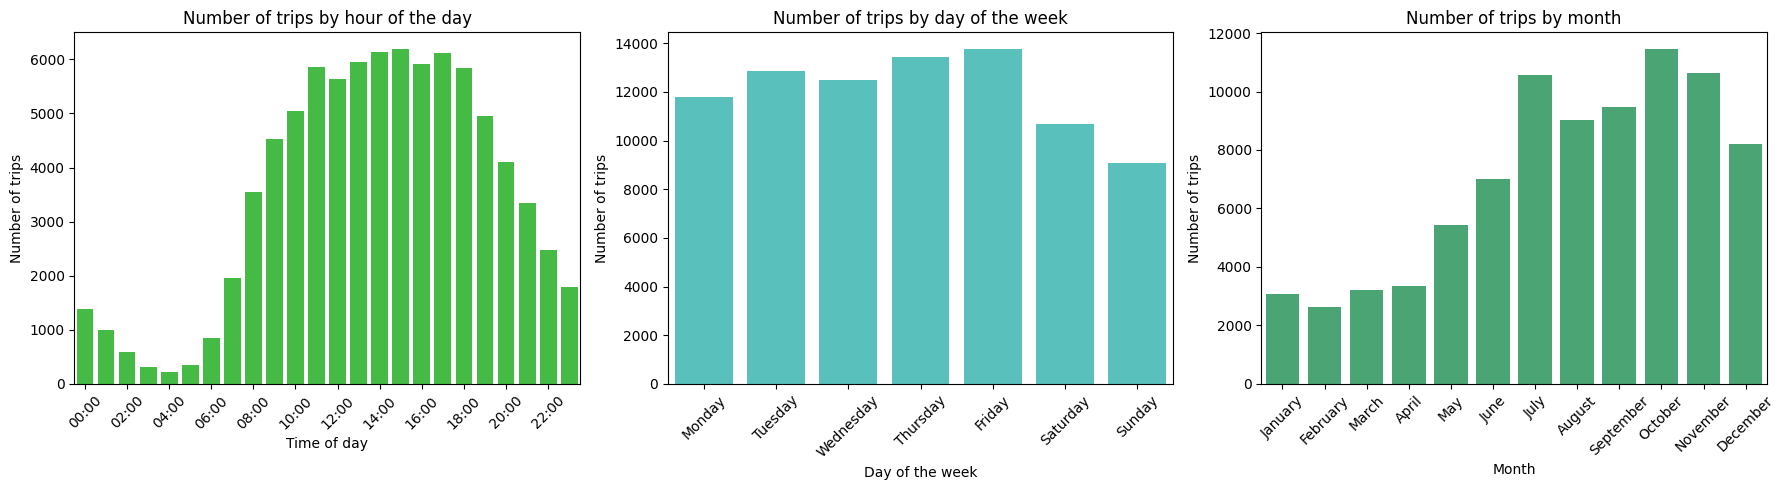

In [ ]:
# Creating 1 row and 3 columns of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Barplot for hours
sns.barplot(x='hour', y='unique_key', data=grouped_by_hours_unique, ax=axes[0], color='limegreen')
axes[0].set_title('Number of trips by hour of the day')
axes[0].set_xlabel('Time of day')
axes[0].set_ylabel('Number of trips')
axes[0].set_xticks(range(0, 24, 2))
axes[0].set_xticklabels([f"{x:02d}:00" for x in range(0, 24, 2)], rotation=45)

# Barplot for days of the week
sns.barplot(x='dayofweek', y='unique_key', data=grouped_by_dayofweek_unique, ax=axes[1], color='mediumturquoise')
axes[1].set_title('Number of trips by day of the week')
axes[1].set_xlabel('Day of the week')
axes[1].set_ylabel('Number of trips')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Barplot for months
sns.barplot(x='month', y='unique_key', data=grouped_by_month_unique, ax=axes[2], color='mediumseagreen')
axes[2].set_title('Number of trips by month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of trips')
axes[2].set_xticks(range(12))
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show();

**Conclusion: The highest workload occurs from 08:00 to 20:00 on working days. In terms of months, the highest number was in July, October, and November; overall, from May to December, there were significantly more trips than in the first 4 months of 2021.**

# **2. What is the average cost of a trip and how has it changed over the year?**

Let's calculate the average cost of the trip:

In [ ]:
# Average trip cost (rounded to cents)
average_fare_year = df['fare'].mean()
print(f'The average trip cost for the year was {average_fare_year:.2f}$')

The average trip cost for the year was 19.49$


Let's determine how the average cost of a trip changed throughout the year.

In [ ]:
# Grouping data by months and calculating the average
grouped_by_month_mean = group_by_time_unit(df, 'trip_start_timestamp', 'fare', 'month', 'mean')
grouped_by_month_mean

,month,fare
4,January,19.994370
3,February,17.840715
7,March,17.637416
0,April,17.234215
8,May,17.334506
6,June,18.145890
5,July,19.266384
1,August,20.670505
11,September,20.904577
10,October,20.637447


To present the dynamics more clearly, let's display it on a line graph.

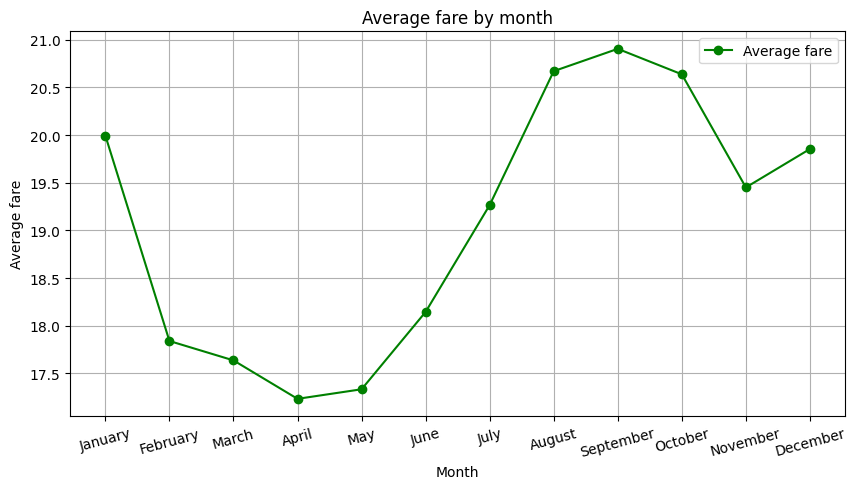

In [ ]:
plt.figure(figsize=(10, 5))

# Building a graph with points
plt.plot('month', 'fare', data=grouped_by_month_mean, marker='o', linestyle='-', color='g', label='Average fare')

# Setting up axes and titles
plt.xticks(rotation=15)
plt.xlabel('Month')
plt.ylabel('Average fare')
plt.title('Average fare by month')
plt.legend()
plt.grid(True)

plt.show();

**Conclusion: The average fare increased from May to September in 2021, which visually coincides with the increase in the number of trips by month in 2021. Considering that the average fare for the entire year was $19.49, most trips from July to November were more expensive than the average fare.**

# **3. Based on the data obtained above, we will analyze how much money was received each month and add the average income for each month. We will also consider the income according to each type of payment.**

In [ ]:
# Calculate monthly revenue
grouped_by_month_sum = group_by_time_unit(df, 'trip_end_timestamp', 'trip_total', 'month', 'sum')

# Calculate daily revenue
grouped_by_date_sum = group_by_time_unit(df, 'trip_end_timestamp', 'trip_total', 'date', 'sum')
grouped_by_date_sum['date'] = pd.to_datetime(grouped_by_date_sum['date'])

grouped_by_date_sum['month'] = grouped_by_date_sum['date'].dt.month_name()
grouped_mean = grouped_by_date_sum.groupby('month')['trip_total'].mean().reset_index()

# Merge monthly and daily revenue data
revenue_total_average_monthly = pd.merge(
    grouped_by_month_sum, grouped_mean, on='month', how='left'
)

# Rename columns for convenience
revenue_total_average_monthly.columns = ['Month', 'Total_revenue', 'Average_day_revenue']

# Style the table with formatting and gradient
styled_table = revenue_total_average_monthly.style.format({
    'Total_revenue': '{:.2f}',
    'Average_day_revenue': '{:.2f}'
}).background_gradient(axis=0, cmap='BuGn')

# Display the styled table
display(styled_table)

,Month,Total_revenue,Average_day_revenue
0,January,66156.37,2067.39
1,February,51647.32,1844.55
2,March,63258.11,2040.58
3,April,64835.15,2161.17
4,May,109011.25,3516.49
5,June,147908.70,4930.29
6,July,243833.56,7865.60
7,August,227031.13,7323.58
8,September,238011.41,7933.71
9,October,286040.31,9227.11


**Conclusion: As we can see from the table above, the top revenues were from July to November, which aligns with our conclusion in the previous question.**

We will also calculate the income for each month for all types of payments:

In [ ]:
# Extract month names from the date
df['month'] = df['trip_end_timestamp'].dt.month_name()

# Calculate revenue by month and payment type
revenue_per_month_payment_type = df.groupby(['month', 'payment_type'])['trip_total'].sum().reset_index()

# Convert data into a pivot table, filling missing values with zeros
pivot = revenue_per_month_payment_type.pivot(
    index='month', columns='payment_type', values='trip_total'
).fillna(0)

# Style the table with formatting and gradient
display(pivot.style.format("{:,.2f}").background_gradient(axis=0, cmap='Greens'))

payment_type,Cash,Credit Card,Dispute,No Charge,Unknown
month,,,,,
April,"20,562.54","24,442.86",0.00,0.00,"19,829.75"
August,"65,254.10","131,825.20",56.00,50.75,"29,845.08"
December,"52,805.18","91,879.70",75.00,36.25,"45,297.99"
February,"14,843.35","14,673.72",0.00,0.00,"22,130.25"
January,"15,799.26","13,569.00",0.00,0.00,"36,788.11"
July,"73,063.47","135,770.92",227.00,59.75,"34,712.42"
June,"46,282.75","69,992.90",11.25,0.00,"31,621.80"
March,"18,919.82","22,993.84",0.00,0.00,"21,344.45"
May,"33,984.19","51,240.13",0.00,0.00,"23,786.93"


**Conclusion: as we can see from the table above, the top payment method is a credit card. It is also worth noting that in the low season (January-April), the amount of revenue from cash and credit card payments differs only slightly. Additionally, a significant portion of each month consists of an unknown payment method, especially in the low season; this information requires further clarification.**

# **4. What are the 5 most popular locations for boarding and alighting?**

Group the data by the location of landing and planting and output the top 5.

In [ ]:
# Calculate the number of trips by pickup area
grouped_by_pickup = df.groupby('pickup_community_area')['unique_key'].nunique().reset_index().rename(columns={'unique_key': 'pickup_cases'})

# Calculate the number of trips by dropoff area
grouped_by_dropoff = df.groupby('dropoff_community_area')['unique_key'].nunique().reset_index().rename(columns={'unique_key': 'dropoff_cases'})

# Get the top-5 pickup areas
top_5_pickup = grouped_by_pickup.nlargest(5, 'pickup_cases')

# Get the top-5 dropoff areas
top_5_dropoff = grouped_by_dropoff.nlargest(5, 'dropoff_cases')

In [ ]:
# Style the table with formatting and gradient
top_5_pickup = top_5_pickup.style.format({
    'pickup_community_area': "{:.0f}",
    'dropoff_cases': "{:.0f}"
}).background_gradient(axis=0, subset=['pickup_cases'], cmap='Greens')
display(top_5_pickup)

,pickup_community_area,pickup_cases
7,8,20899
31,32,16507
75,76,12025
27,28,9113
32,33,2561


In [ ]:
# Style the table with formatting and gradient
top_5_dropoff = top_5_dropoff.style.format({
    'dropoff_community_area': "{:.0f}",
    'dropoff_cases': "{:.0f}"
}).background_gradient(axis=0, subset=['dropoff_cases'], cmap='Greens')
display(top_5_dropoff)

,dropoff_community_area,dropoff_cases
7,8,20759
31,32,13216
27,28,8013
5,6,3244
6,7,3144


#**5. How does the average trip duration change depending on the season?**

Let's calculate the average trip length in miles by month, sorted from largest to smallest.

In [ ]:
# Calculate the average trip length per month
average_miles_per_month = group_by_time_unit(df, 'trip_start_timestamp', 'trip_miles', 'month', 'mean')

# Sort in descending order
average_miles_sorted = average_miles_per_month.sort_values(by='trip_miles', ascending=False)
average_miles_sorted

,month,trip_miles
4,January,5.730904
6,June,5.386494
5,July,5.377367
8,May,5.190797
1,August,5.063982
0,April,4.969896
3,February,4.745688
7,March,4.710447
11,September,4.532239
2,December,4.518731


To improve visibility, let's create a bar chart:

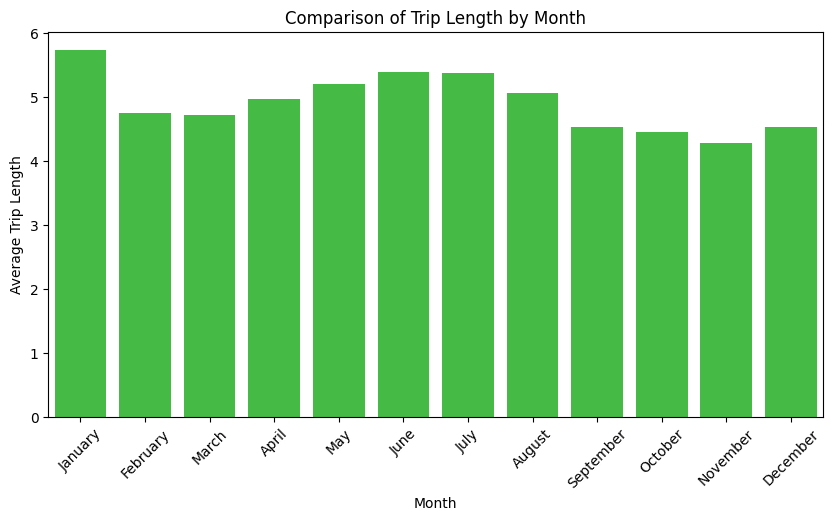

In [ ]:
# Setting the size of the plot
plt.figure(figsize=(10, 5))

# Building the barplot
sns.barplot(data=average_miles_per_month, x='month', y='trip_miles', color='limegreen')

# Setting the display
plt.xticks(rotation=45)  # Rotating month labels for better appearance
plt.xlabel('Month')
plt.ylabel('Average Trip Length')
plt.title('Comparison of Trip Length by Month')

# Displaying the plot
plt.show();

**Conclusion: The average trip length increases during the summer months, as well as in December-January. Perhaps this is related to the New Year holidays? It is worth analyzing the top month, January, in terms of trip lengths to make a final conclusion.**

Perhaps longer trips occur in January during the first days of the month, after the New Year? Let's check this by calculating the average trip length by days of the week.

In [ ]:
# Let's output the average trip length by date.
average_miles_date = group_by_time_unit(df, 'trip_start_timestamp', 'trip_miles', 'date', 'mean')

# Converting the date column to datetime format.
average_miles_date['date'] = pd.to_datetime(average_miles_date['date'])

# Adding the name of the day of the week
average_miles_date['week_day'] = average_miles_date['date'].dt.day_name()

# Filtering only for the desired month January and sorting in descending order.
filtered_trips_january = average_miles_date[average_miles_date['date'].dt.month_name() == 'January']
average_miles_jan_sorted = filtered_trips_january.sort_values(by='trip_miles', ascending=False)

display(average_miles_jan_sorted)

,date,trip_miles,week_day
2,2021-01-03,9.236508,Sunday
30,2021-01-31,8.160638,Sunday
1,2021-01-02,7.759459,Saturday
22,2021-01-23,7.600000,Saturday
23,2021-01-24,7.367606,Sunday
16,2021-01-17,7.101639,Sunday
9,2021-01-10,6.985185,Sunday
0,2021-01-01,6.837879,Friday
17,2021-01-18,6.704167,Monday
21,2021-01-22,6.665833,Friday


**Conclusion: It can be noted that the longest trips occurred on Sunday, January 3rd, after the New Year. It can also be observed that the longest trips in January 2021 mainly fell on weekends. Most likely, weekends were associated with attending church, meeting friends, and family gatherings.**

#**6. Let's analyze what percentage of trips are less than 2 miles (short trips), from 2 to 7 miles (medium trips), and more than 7 miles (long trips)? Is there a difference in the fare and earnings per mile for short trips compared to long trips?**

In [ ]:
trips_distance = df[['unique_key', 'trip_miles']]

# Creating a new dataframe with selected columns
trips_distance = df[['unique_key', 'trip_miles']].copy()

# Function to categorize trips
def categorize_trip(miles):
    if miles < 2:
        return 'Short trip'
    elif 2 <= miles < 7:
        return 'Medium trip'
    else:
        return 'Long trip'

# Applying the function to the trip_miles column
trips_distance['trip_category'] = df['trip_miles'].apply(categorize_trip)

# Counting the number of trips by category
trip_distance_grouped = trips_distance.groupby('trip_category')['unique_key'].count().reset_index().rename(columns={'unique_key':'num_of_trips'})

# Adding a column with the percentage of the total number of trips
trip_distance_grouped['Percent_from_total'] = (
    trip_distance_grouped['num_of_trips'] / trip_distance_grouped['num_of_trips'].sum() * 100
).round(2)
display(trip_distance_grouped)

,trip_category,num_of_trips,Percent_from_total
0,Long trip,22671,26.96
1,Medium trip,18125,21.56
2,Short trip,43290,51.48


For clarity, let's illustrate this using a pie chart.

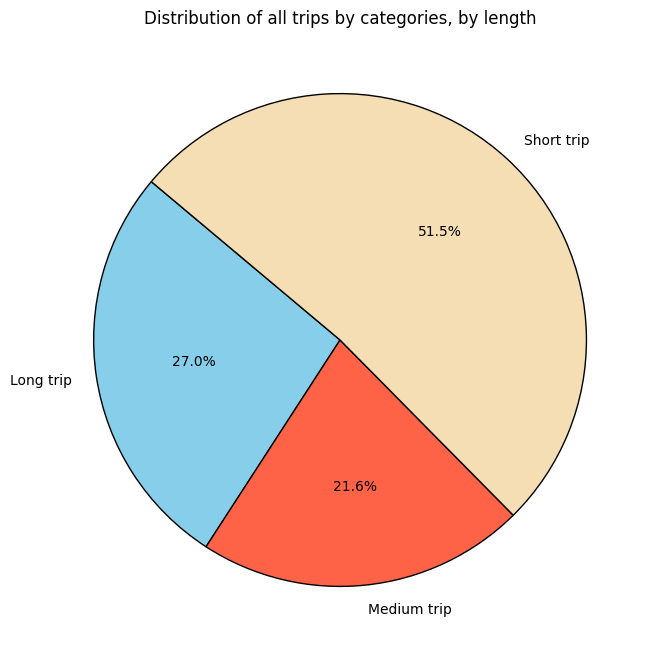

In [ ]:
# Building a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    trip_distance_grouped['Percent_from_total'],
    labels=trip_distance_grouped['trip_category'],
    autopct='%1.1f%%',  # Displaying percentages on the chart
    startangle=140,
    colors=['skyblue','tomato','wheat'],  # Setting colors
    wedgeprops={'edgecolor': 'black'}  # Black edges for clarity
)

plt.title('Distribution of all trips by categories, by length')
plt.show();

Let's calculate the average rate per mile and earnings per mile.

In [ ]:
# Calculating the cost and revenue per mile
trips_distance['fare_per_one_mile'] = df['fare'] / df['trip_miles']
trips_distance['revenue_per_one_mile'] = df['trip_total'] / df['trip_miles']

# Calculating the average fare and revenue per mile for each trip category
revenue_fare_mean = trips_distance.groupby('trip_category')[['fare_per_one_mile', 'revenue_per_one_mile']].mean().rename(columns={
    'fare_per_one_mile': 'mean_fare_per_mile',
    'revenue_per_one_mile': 'mean_revenue_per_mile'
})

# Styling the table with formatting and gradient
styled_df = revenue_fare_mean.style.format({
    'fare_per_one_mile': '{:.2f}',
    'revenue_per_one_mile': '{:.2f}'
}).background_gradient(axis=0, cmap='BuGn')

# Displaying the styled table
display(styled_df)


,mean_fare_per_mile,mean_revenue_per_mile
trip_category,,
Long trip,2.765164,3.130412
Medium trip,4.186315,4.821884
Short trip,22.398545,27.324825


**Conclusion: According to the obtained data, it is clear that the average earnings per mile are highest among short trips. Considering that short trips account for more than half of all trips, in the case of stimulating customer demand, one should focus on encouraging the use of taxis specifically for short trips.**

# **7. In which areas is cash payment more common?**

In [ ]:
# Group data by the number of payments per column based on payment type
payment_counts = df.groupby(['pickup_community_area', 'payment_type'])['unique_key'].count().unstack(fill_value=0)

# Sum all other payment types except cash
payment_counts['Other_types'] = payment_counts[['Credit Card', 'Dispute', 'No Charge', 'Unknown']].sum(axis=1)

# Compare areas where cash payments dominate over other payment types
payment_counts['Cash_dominance'] = payment_counts['Cash'] > payment_counts['Other_types']

# Keep only the areas where cash payments are dominant
cash_dominant_areas = payment_counts[payment_counts['Cash_dominance']].copy()

# Sort the top 5 by descending order and display the results
top_5_cash_dominant_areas = cash_dominant_areas.sort_values(by='Cash', ascending=False).head(5)
display(top_5_cash_dominant_areas['Cash'])


,Cash
pickup_community_area,
32,8361
6,744
77,601
3,587
14,91


**Conclusion: the top areas for cash payments are 32, 6, 77, 3, and 14.**

#**8 in which locations do they pay the highest tips? And do these locations coincide with the top month for the total amount of tips?**

Let's output the top 5 locations by tips.

In [ ]:
# Remove trips where no tips were left
df_tips_notzero = df[df['tips'] > 0]

# Group data by pickup location and output the sum of tips
grouped_by_pickup_tips = df_tips_notzero.groupby('pickup_community_area')['tips'].sum().reset_index()

# Sort the top 5 locations by total tips and display on the screen
top5_tips = grouped_by_pickup_tips.sort_values(by='tips', ascending=False).head(5)
display(top5_tips)

,pickup_community_area,tips
41,76,72904.06
7,8,30700.56
23,32,23457.72
20,28,9024.00
34,56,7426.99


Let's determine the best month based on the total amount of tips.

In [ ]:
# Let's output the total tips for each month
grouped_tips_month_sum = group_by_time_unit(df_tips_notzero, 'trip_end_timestamp', 'tips', 'month', 'sum')

# Sort the data in descending order and output the Top month by total tips
grouped_tips_month_sum = grouped_tips_month_sum.sort_values(by='tips', ascending=False)
top_month = grouped_tips_month_sum.iloc[0][0]
print(f"The top month by total tips is {top_month}")

The top month by total tips is October


Let's compare the top locations by tips in the best month and overall.

In [ ]:
# Convert the data from the filtered dataframe to datetime format
df_tips_notzero['trip_end_timestamp'] = pd.to_datetime(df_tips_notzero['trip_end_timestamp'])

# Add a column with the names of the months
df_tips_notzero['month_name'] = df_tips_notzero['trip_end_timestamp'].dt.month_name()

# Filter the data only for the best month
filtered_tips_top_month = df_tips_notzero[df_tips_notzero['month_name'] == top_month]

grouped_tips_top_month = filtered_tips_top_month.groupby('pickup_community_area')['tips'].sum().reset_index()

top5_tips_top_month = grouped_tips_top_month.sort_values(by='tips', ascending=False).head(5)
display(top5_tips_top_month)

,pickup_community_area,tips
22,76,13417.11
4,8,5383.89
13,32,4223.20
14,33,1607.07
12,28,1319.48


**Conclusion: The top 5 locations by total tips are 76, 8, 32, 28, and 56, while the top 5 locations by total tips in the top month are 76, 8, 32, 33, and 28. As we can see, the first three locations have the highest total tips both within the top month for tips and overall.**

#**9. Does the average speed of the trip affect the amount of tips?**

Let's calculate the average speed and average tips for each date.

In [ ]:
# Calculate the average speed in miles per hour
df['average_speed'] = df['trip_miles'] / (df['trip_seconds'] / 3600)

# Output the average tips for each date
tips_grouped_by_date = group_by_time_unit(df, 'trip_start_timestamp', 'tips', 'date', 'mean')

# Output the average speed for each date
average_speed_grouped_by_date = group_by_time_unit(df, 'trip_start_timestamp', 'average_speed', 'date', 'mean')

Let's combine both indicators into one dataframe for display on the graph.

In [ ]:
# Rename columns for easier future merging
new_columns_names = ['date', 'result']
tips_grouped_by_date.columns = new_columns_names
average_speed_grouped_by_date.columns = new_columns_names

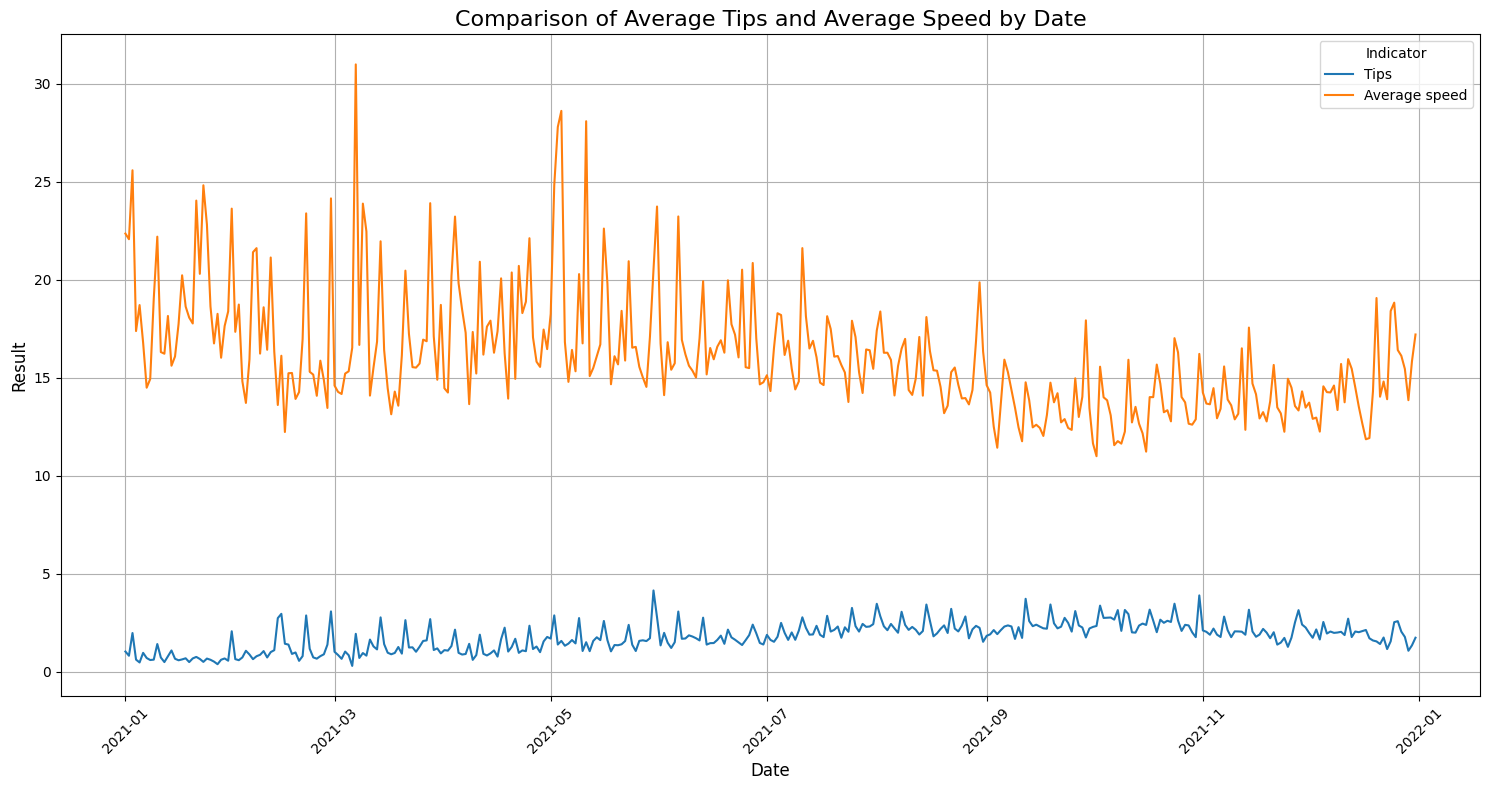

In [ ]:
# Adding columns with the source for data identification during merging
tips_grouped_by_date['source'] = 'Tips'
average_speed_grouped_by_date['source'] = 'Average speed'

# Creating a combined table
combined_df = pd.concat([tips_grouped_by_date, average_speed_grouped_by_date])

# Building a line graph with two indicators for comparison
plt.figure(figsize=(15, 8))
sns.lineplot(data=combined_df, x='date', y='result', hue='source')

# Customizing the graph
plt.title('Comparison of Average Tips and Average Speed by Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Result', fontsize=12)
plt.legend(title='Indicator')
plt.grid(True)
plt.xticks(rotation=45)

# Displaying the graph
plt.tight_layout()
plt.show();

**Conclusion: no visual connection is observed, additional verification is probably needed.**

#**10. Let's determine if there is indeed a relationship between these two indicators.**

First, let's check the samples for normality. We will use the Shapiro-Wilk test for this, and we will build a histogram and a QQ plot.

In [ ]:
# Creating a combined table with two metrics
merged_df = pd.merge(tips_grouped_by_date, average_speed_grouped_by_date, on='date')

# Removing the original data
merged_df = merged_df.drop(['source_x', 'source_y'], axis=1)

# Renaming columns
merged_df.columns = ['date', 'tips', 'average_speed']

In [ ]:
# Create 2 separate samples for testing
data_tips = merged_df['tips']
data_speed = merged_df['average_speed']

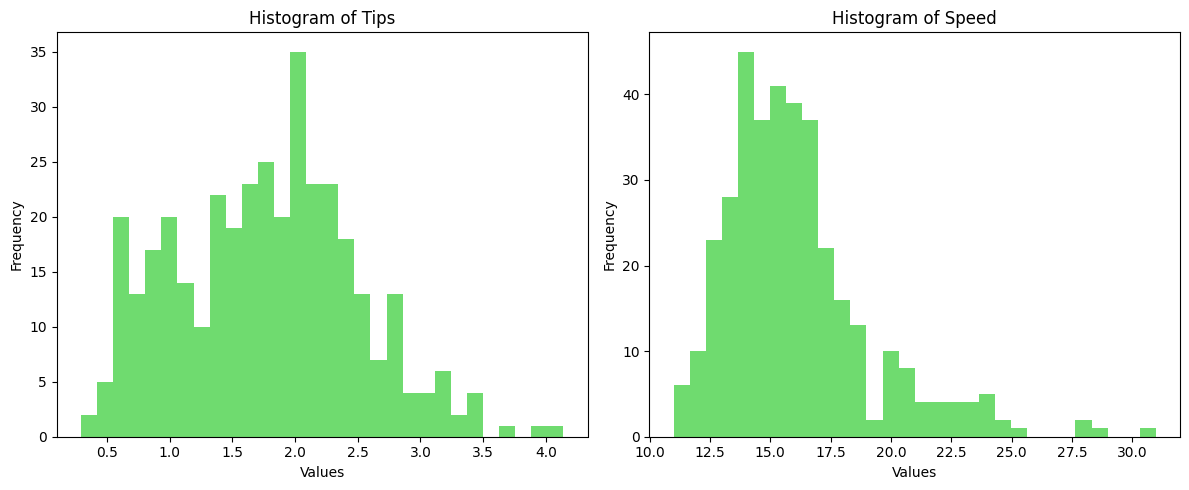

In [ ]:
# Creating 2 spaces for plots to be placed on one page
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for data_tips
axes[0].hist(data_tips, bins=30, color='limegreen', alpha=0.7)
axes[0].set_title("Histogram of Tips")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Frequency")

# Histogram for data_speed
axes[1].hist(data_speed, bins=30, color='limegreen', alpha=0.7)
axes[1].set_title("Histogram of Speed")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Frequency")

# Optimizes the layout of the plots
plt.tight_layout()
plt.show()

**It is visually evident that the distribution of data in the samples is not normal.**

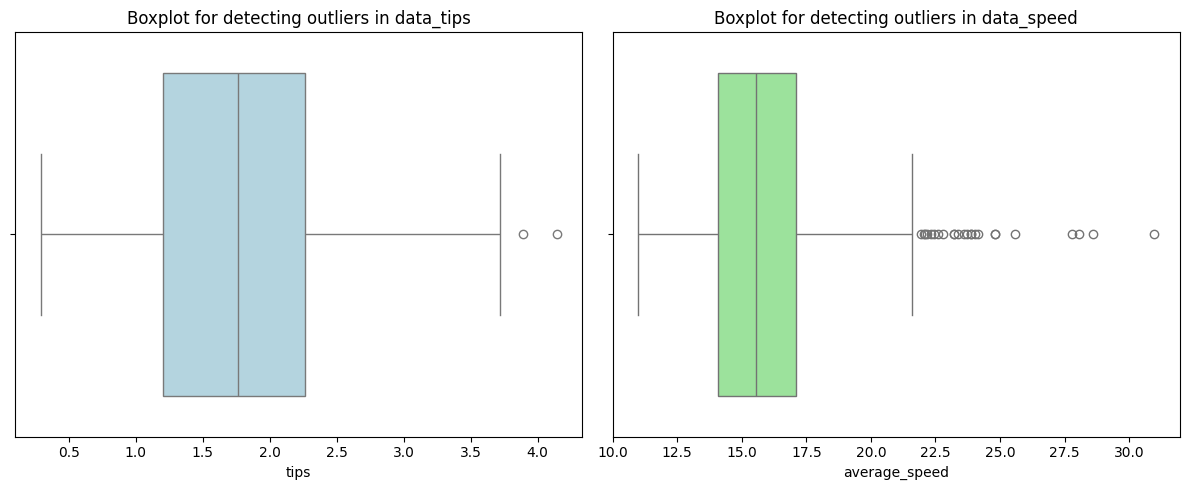

In [ ]:
# Create 2 subplots to place on one page
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First boxplot for data_tips
sns.boxplot(x=data_tips, ax=axes[0], color="lightblue")
axes[0].set_title("Boxplot for detecting outliers in data_tips")

# Second boxplot for data_speed
sns.boxplot(x=data_speed, ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot for detecting outliers in data_speed")

# Show the plot
plt.tight_layout()
plt.show();

Let's remove the outliers and recheck the samples.

In [ ]:
# Filter values to keep only those that meet the specified conditions
df_filtered = merged_df[~((merged_df['tips'] > 3.5) | (merged_df['average_speed'] > 21))]

In [ ]:
# Viewing residual lines
df_filtered.shape

(334, 3)

In [ ]:
# Creating 2 samples again for testing
data_tips_norm = df_filtered['tips']
data_speed_norm =  df_filtered['average_speed']

Now let's build a QQ plot for a visual check of the sample.

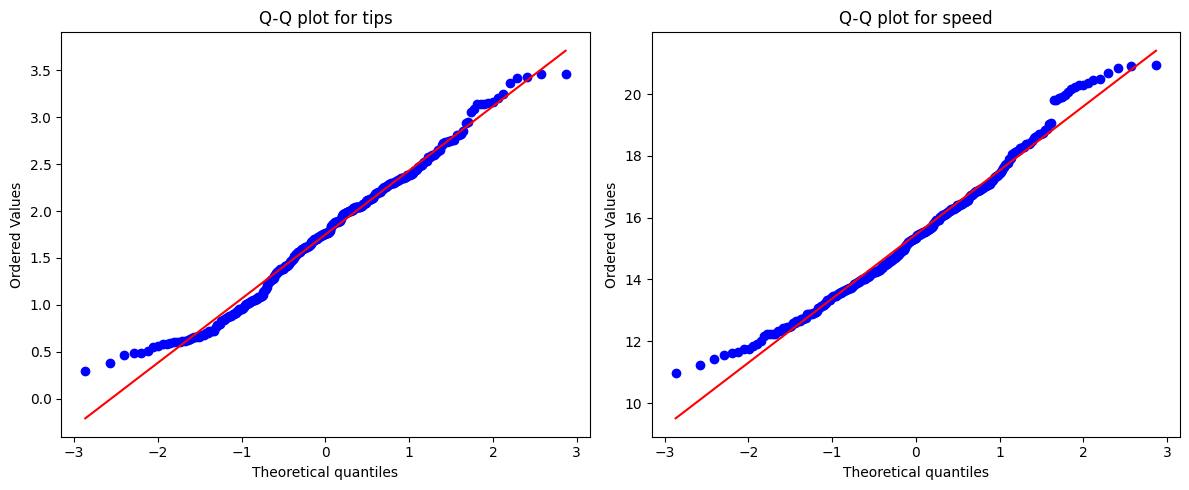

In [ ]:
# Importing the necessary library for plotting
import scipy.stats as stats

# Creating 2 places for plots, to place on one page
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot for data_tips
stats.probplot(data_tips_norm, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot for tips")

# Q-Q plot for data_speed
stats.probplot(data_speed_norm, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot for speed")

plt.tight_layout()  # Optimizes the layout of the plots
plt.show();

**Visually, it's hard to say for sure, but most likely at least the data on average speed does not have a normal distribution.**

Let's conduct the Shapiro-Wilk test to make a final conclusion.  
The null hypothesis is that the data is normally distributed, the alternative hypothesis H1 is that the data is not normally distributed.

In [ ]:
# Importing the necessary library for the Shapiro-Wilk test
from scipy.stats import shapiro

# Performing the test for two samples
stat_speed, p_speed = shapiro(data_speed_norm)
stat_tips, p_tips = shapiro(data_tips_norm)

# Outputting the results
print(f"Shapiro-Wilk test for data_speed: Test statistic={stat_speed:.4f}, p-value={p_speed:.4f}")
print(f"Shapiro-Wilk test for data_tips: Test statistic={stat_tips:.4f}, p-value={p_tips:.4f}")

# Interpretation
alpha = 0.05
if p_speed > alpha:
    print("data_speed has a normal distribution (do not reject H0)")
else:
    print("data_speed does NOT have a normal distribution (reject H0)")

if p_tips > alpha:
    print("data_tips has a normal distribution (do not reject H0)")
else:
    print("data_tips does NOT have a normal distribution (reject H0)")

Shapiro-Wilk test for data_speed: Test statistic=0.9826, p-value=0.0005
Shapiro-Wilk test for data_tips: Test statistic=0.9856, p-value=0.0020
data_speed does NOT have a normal distribution (reject H0)
data_tips does NOT have a normal distribution (reject H0)


**So, the samples are not normal. We will take this into account when detecting the correlation between these indicators.**

Let's create a scatter plot for visually observing the relationship between average speed and average tips.

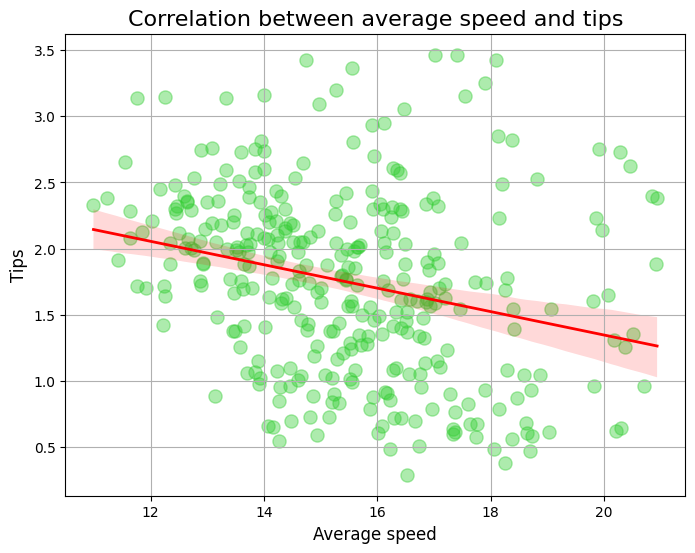

In [ ]:
# Creating a scatter plot with a trend line
plt.figure(figsize=(8, 6))
sns.regplot(data=df_filtered, x='average_speed', y='tips', scatter_kws={'color': 'limegreen', 'alpha': 0.4, 's': 90}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Correlation between average speed and tips', fontsize=16)
plt.xlabel('Average speed', fontsize=12)
plt.ylabel('Tips', fontsize=12)
plt.grid(True)
plt.show()

The graph shows a negative correlation between these two indicators. To verify, we will calculate the Spearman correlation coefficient, as the samples are not normal.

In [ ]:
# Calculation of correlation between columns
from scipy.stats import spearmanr
corr, p_value = spearmanr(data_tips_norm, data_speed_norm)

print(f"Correlation between average speed and tips: {corr}, p-value: {p_value}")

Correlation between average speed and tips: -0.3164557532776319, p-value: 3.329983614996437e-09


**Conclusion: The correlation coefficient value of -0.316 indicates that there is a moderate negative relationship between these two indicators. That is, there is a tendency for the sum of tips to decrease as the average speed increases, but this relationship is not very strong. Meanwhile, the p-value = 3.33e-09, which is significantly less than 0.05, so we can reject the null hypothesis of no correlation, meaning that the relationship is statistically significant. Based on the obtained data, it can be suggested that passengers prefer comfortable and calm trips over faster ones. And they pay more tips during non-fast trips.**